In [225]:
import gensim.downloader
import numpy as np
import pandas as pd
from keras.models import Model
from keras.layers import Dense, Input, Dropout, LSTM,GRU, Activation,BatchNormalization
from keras.layers.embeddings import Embedding
from keras.utils import to_categorical
from tensorflow.python.keras.preprocessing.text import Tokenizer

In [226]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [3]:
# import pandas as pd

# data=pd.read_csv('talking about colors.csv')
# data['Data']=data['Data'].str.lower()
# sentences=data['Data'].values

In [4]:
# sentences
# t=Tokenizer()
# t.fit_on_texts(sentences)

In [5]:
# tokenized_list=t.word_docs.keys()

In [6]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [7]:
#tokenized_list=[nltk.word_tokenize(sentence) for sentence in sentences]

In [8]:
# tokenized_list

In [9]:

# from gensim.test.utils import common_texts
# from gensim.models import Word2Vec

# word_vectors=Word2Vec(sentences=tokenized_list, size=100, min_count=1)

In [10]:
# len(word_vectors.wv.vocab)

In [11]:
# word_vectors.wv.vocab

In [12]:
# word_vectors['red']

In [13]:
word_vectors = gensim.downloader.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [14]:
len(word_vectors.wv.vocab)
vocab_list=list(word_vectors.wv.vocab)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  


In [15]:
vocab_dict={vocab_list[i]:i for i in range(len(vocab_list))}

In [16]:
len(vocab_dict)

400000

In [17]:
word_vectors['red']

array([-0.30017 ,  0.50145 , -0.12753 , -0.81638 ,  0.33615 ,  0.32211 ,
       -0.04737 ,  0.037144, -0.61578 , -0.22329 , -0.39129 , -0.31887 ,
        0.87088 ,  0.74448 ,  0.23713 ,  0.3177  ,  0.61322 , -0.48161 ,
        0.55453 , -0.48773 , -0.11872 ,  0.15195 , -0.43884 ,  0.045212,
        0.66663 ,  0.64416 , -0.2181  , -0.24217 ,  0.17653 , -0.71786 ,
        0.48887 ,  0.22873 ,  0.080043,  0.12238 ,  0.18637 ,  0.20522 ,
       -0.35139 ,  0.83166 ,  0.86578 ,  0.33401 ,  0.44511 , -0.9813  ,
       -0.10451 , -0.10196 ,  0.65488 ,  0.10677 , -0.095314,  0.5637  ,
        0.048797, -0.10838 ,  0.10542 ,  0.0412  , -0.29388 ,  1.0227  ,
       -0.86572 , -2.5878  , -0.50076 ,  0.97575 ,  1.556   ,  0.45211 ,
       -0.54279 ,  0.81993 , -0.60832 ,  0.19918 ,  0.7497  , -0.39138 ,
        0.060502, -0.056905, -0.012081,  0.062096,  0.070589, -0.47981 ,
       -0.86613 , -0.59337 ,  0.57646 ,  0.98374 , -0.035101,  0.42026 ,
       -0.40591 ,  0.35105 ,  0.87392 , -0.06941 , 

In [18]:
word_vectors.most_similar("red")

[('yellow', 0.8597683310508728),
 ('blue', 0.8435065746307373),
 ('green', 0.8204778432846069),
 ('black', 0.7679567337036133),
 ('white', 0.7675363421440125),
 ('purple', 0.7657994031906128),
 ('pink', 0.7491968870162964),
 ('orange', 0.7140781283378601),
 ('dark', 0.699396014213562),
 ('gray', 0.6913918256759644)]

In [19]:
# sentences

In [20]:
# word_vectors.train([["hello", "world"]], total_examples=1, epochs=1)

We import Training Data here:


In [725]:
data=pd.read_csv('color_name_to_colors.csv')
data['Name']=data['Name'].str.lower()
data.head()

,Name,R,G,B
0,air force blue,93,138,168
1,alice blue,240,248,255
2,alizarin crimson,227,38,54
3,almond,239,222,205
4,amaranth,229,43,80


In [726]:
names=data['Name']
maxlen=4
t=Tokenizer()
t.fit_on_texts(names)

In [727]:
word_to_index=t.word_index
print(len(word_to_index))
#print(len(word_vectors[]))

502


In [728]:
names=names.to_list()

In [729]:
np.shape(names)

(755,)

In [730]:
from tensorflow.python.keras import preprocessing

tokenized=[nltk.word_tokenize(name) for name in names]


In [731]:
#tokenized

In [732]:
tokenized[0]

['air', 'force', 'blue']

In [733]:
print(vocab_dict['anti'])

811


In [734]:
# tokenized= [vocal_dict[word] for word in tokenized]
# tokenized=np.array(tokenized)
# tokenized
tokenized_index=[]
sub=[]
for m in tokenized:
  sub=[]
  for word in m:
    sub.append(vocab_dict[word])
  tokenized_index.append(sub)

In [735]:
np.shape(tokenized_index)

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


(755,)

In [736]:
padded_names=preprocessing.sequence.pad_sequences(tokenized_index,maxlen=maxlen)
print(padded_names)
print(padded_names.shape)

[[     0    325    352   1185]
 [     0      0   7099   1185]
 [     0      0 281874  15762]
 ...
 [     0      0   2843    989]
 [     0      0   1479   1185]
 [     0      0      0      0]]
(755, 4)


In [737]:
word_vectors["cucumber"].shape[0] 

100

In [738]:
# one_hot_names=to_categorical(padded_names)
# one_hot_names.shape

In [739]:
# num_classes=one_hot_names.shape[-1]
# num_classes

In [740]:
def pretrained_embedding_layer(word_to_vec_map, word_to_index):
    """
    Creates a Keras Embedding() layer and loads in pre-trained GloVe 50-dimensional vectors.
    
    Arguments:
    word_to_vec_map -- dictionary mapping words to their GloVe vector representation.
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    embedding_layer -- pretrained layer Keras instance
    """
    
    vocab_len = len(word_to_index) + 1                  # adding 1 to fit Keras embedding (requirement)
    emb_dim = word_to_vec_map["cucumber"].shape[0]      # define dimensionality of your GloVe word vectors (= 50)
    
    ### START CODE HERE ###
    # Step 1
    # Initialize the embedding matrix as a numpy array of zeros.
    # See instructions above to choose the correct shape.
    emb_matrix = np.zeros([vocab_len,word_to_vec_map["cucumber"].shape[0]])
    
    # Step 2
    # Set each row "idx" of the embedding matrix to be 
    # the word vector representation of the idx'th word of the vocabulary
    for word, idx in word_to_index.items():
        
        emb_matrix[idx, :] = word_to_vec_map[word]
    print("embedding matrix",emb_matrix.shape)
    # print("embedding matrix",emb_matrix)
    # Step 3
    # Define Keras embedding layer with the correct input and output sizes
    # Make it non-trainable.
    embedding_layer = Embedding(vocab_len,emb_dim,trainable=False)
    ### END CODE HERE ###

    # Step 4 (already done for you; please do not modify)
    # Build the embedding layer, it is required before setting the weights of the embedding layer. 
    embedding_layer.build((None,)) # Do not modify the "None".  This line of code is complete as-is.
    
    # Set the weights of the embedding layer to the embedding matrix. Your layer is now pretrained.
    embedding_layer.set_weights([emb_matrix])
    
    return embedding_layer

In [741]:
# GRADED FUNCTION: Emojify_V2

def Emojify_V2(input_shape, word_to_vec_map, word_to_index):
    """
    Function creating the Emojify-v2 model's graph.
    
    Arguments:
    input_shape -- shape of the input, usually (max_len,)
    word_to_vec_map -- dictionary mapping every word in a vocabulary into its 50-dimensional vector representation
    word_to_index -- dictionary mapping from words to their indices in the vocabulary (400,001 words)

    Returns:
    model -- a model instance in Keras
    """
    
    ### START CODE HERE ###
    # Define sentence_indices as the input of the graph.
    # It should be of shape input_shape and dtype 'int32' (as it contains indices, which are integers).
    sentence_indices = Input(dtype='int32',shape=input_shape)
    
    # Create the embedding layer pretrained with GloVe Vectors (≈1 line)
    embedding_layer = pretrained_embedding_layer(word_to_vec_map,word_to_index)
    
    # Propagate sentence_indices through your embedding layer
    # (See additional hints in the instructions).
    embeddings = embedding_layer(sentence_indices)   
    
    # Propagate the embeddings through an LSTM layer with 128-dimensional hidden state
    # The returned output should be a batch of sequences.
    # X = LSTM(units=128,return_sequences=True)(embeddings)
    # Add dropout with a probability of 0.5
    #X = Dropout(0.9)(embeddings)
    # Propagate X trough another LSTM layer with 128-dimensional hidden state
    # The returned output should be a single hidden state, not a batch of sequences.
    X = GRU(units=128,return_sequences=True)(embeddings)
    #X=BatchNormalization()(X)
    #X = Dropout(0.8)(X)

    #X=BatchNormalization()(X)
    X = GRU(units=128,return_sequences=False)(X)
    # Add dropout with a probability of 0.5
    #X=BatchNormalization()(X)
    X = Dropout(0.6)(X)
    # Propagate X through a Dense layer with 5 units
    X = Dense(80,activation='relu')(X)
    X = Dense(3)(X)
    # Add a softmax activation
    X = Activation('sigmoid')(X)
    
    # Create Model instance which converts sentence_indices into X.
    model = Model(inputs=sentence_indices,outputs=X)
    
    ### END CODE HERE ###
    
    return model

In [742]:
model = Emojify_V2((maxlen), word_vectors, vocab_dict)

embedding matrix (400001, 100)


In [743]:
maxlen

4

In [744]:
dataset=list(t.word_index)

In [745]:
def check(dataset,vocal_list):
  c=0
  for word in dataset:
    if(word not in vocab_list):
      c+=1
      print(word)
  print('\n',c,"words")

In [746]:
check(dataset,vocab_list)


 0 words


In [747]:
model.summary()

Model: "model_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
embedding_22 (Embedding)     (None, 4, 100)            40000100  
_________________________________________________________________
gru_26 (GRU)                 (None, 4, 128)            88320     
_________________________________________________________________
gru_27 (GRU)                 (None, 128)               99072     
_________________________________________________________________
dropout_25 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 80)                10320     
_________________________________________________________________
dense_43 (Dense)             (None, 3)                 243

In [748]:
from tensorflow.keras.optimizers import Adam,SGD
model.compile(optimizer=Adam(),loss='mse',metrics=['acc'])

In [749]:
def norm(colors):
  colors=colors/255
  return colors

r=np.array(data['R'])
r=r.reshape([r.shape[0],1])
g=np.array(data['G'])
g=g.reshape([g.shape[0],1])
b=np.array(data['B'])
b=b.reshape([b.shape[0],1])
rgb_values=np.concatenate((r,g,b),axis=1)
rgb_values.shape
normalized_values=norm(rgb_values)

The test set is validation set here.

In [750]:
data_test=pd.read_csv('wikipedia_x11_colors.csv')
data_test['Name']=data_test['Name'].str.lower()
data_test.head()

,Name,R,G,B
0,alice blue,240,248,255
1,antique white,250,235,215
2,aqua,0,255,255
3,aquamarine,127,255,212
4,azure,0,127,255


In [751]:
test_names=data_test['Name']
test_names=test_names.to_list()
testtokenized=[nltk.word_tokenize(name) for name in test_names]

test_tokenized_index=[]
sub=[]
for m in testtokenized:
  sub=[]
  for word in m:
    sub.append(vocab_dict[word])
  test_tokenized_index.append(sub)

test_padded_names=preprocessing.sequence.pad_sequences(test_tokenized_index,maxlen=maxlen)
print(test_padded_names[:3])
print(test_padded_names.shape)

[[    0     0  7099  1185]
 [    0     0 13299   298]
 [    0     0     0 28528]]
(144, 4)


In [752]:
# y_hat=model.predict(test_padded_names)
# y_hat
# y_hat=scale(y_hat)
r=np.array(data_test['R'])
r=r.reshape([r.shape[0],1])
g=np.array(data_test['G'])
g=g.reshape([g.shape[0],1])
b=np.array(data_test['B'])
b=b.reshape([b.shape[0],1])
test_rgb_values=np.concatenate((r,g,b),axis=1)
test_norm_values=norm(test_rgb_values)

In [770]:
history=model.fit(x=padded_names,y=normalized_values,validation_data=(test_padded_names,test_norm_values),batch_size=64,epochs=200)

Epoch 1/200
12/12 [==============================] - 0s 31ms/step - loss: 0.0033 - acc: 0.8980 - val_loss: 0.0107 - val_acc: 0.8264
Epoch 2/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0036 - acc: 0.8993 - val_loss: 0.0113 - val_acc: 0.8333
Epoch 3/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0034 - acc: 0.9152 - val_loss: 0.0109 - val_acc: 0.8472
Epoch 4/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0035 - acc: 0.8901 - val_loss: 0.0114 - val_acc: 0.8472
Epoch 5/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0035 - acc: 0.9046 - val_loss: 0.0118 - val_acc: 0.7986
Epoch 6/200
12/12 [==============================] - 0s 26ms/step - loss: 0.0031 - acc: 0.9046 - val_loss: 0.0110 - val_acc: 0.8472
Epoch 7/200
12/12 [==============================] - 0s 25ms/step - loss: 0.0034 - acc: 0.9007 - val_loss: 0.0116 - val_acc: 0.8056
Epoch 8/200
12/12 [==============================] - 0s 24ms/step - loss: 0.

Text(0.5, 1.0, 'Training and validation loss')

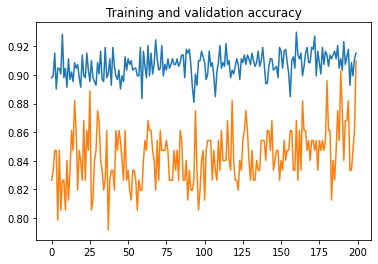

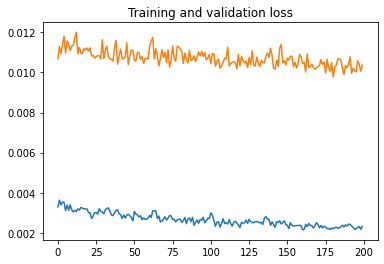

In [771]:
import matplotlib.pyplot as plt
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']
 
# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
 
# Get number of epochs
epochs = range(len(acc))
 
# Plot training and validation accuracy per epoch
plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')
 
plt.figure()
 
# Plot training and validation loss per epoch
plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

In [772]:
def scale(x):
  x=x*255
  #print(x)
  return x

In [773]:
import matplotlib.pyplot as plt
def predict(name):
    name = name.lower()
    tokenized = nltk.word_tokenize(name)
    tokenized= [vocab_dict[word] for word in tokenized]
    tokenized=np.array(tokenized)
    # print(tokenized.dtype)
    # print(tokenized.shape)
    # print(tokenized)
    # print(tokenized[0])
    padded = preprocessing.sequence.pad_sequences([tokenized], maxlen=maxlen)
    #print(tokenized)
    pred = model.predict(np.array(padded))[0]
    #print(pred)
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    img=np.zeros([2,2,3])
    channel=[r,g,b]
    for c in range(3):
      img[:,:,c]=channel[c]
    img=img.astype(np.uint8)
    plt.imshow(img)
    plt.show()

white, R,G,B: 251.98274910449982 246.82092368602753 243.30279886722565


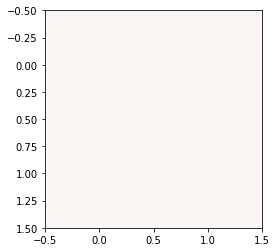

black, R,G,B: 4.215660989284515 6.282256096601486 7.665967047214508


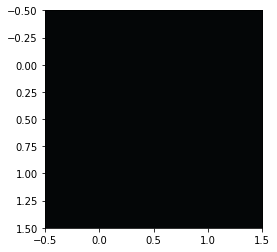

gray, R,G,B: 132.39570289850235 122.02447861433029 127.39309653639793


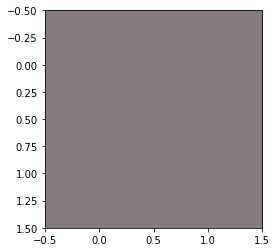

violet, R,G,B: 143.5609781742096 4.841145426034927 244.92139041423798


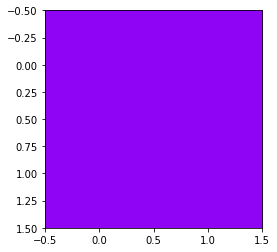

indigo, R,G,B: 73.56041997671127 5.026985853910446 124.16868835687637


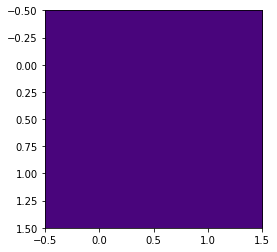

blue, R,G,B: 3.0400648713111877 15.185641944408417 239.83069717884064


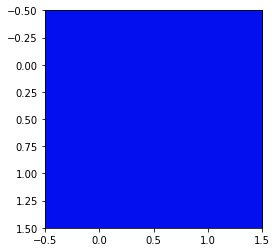

green, R,G,B: 9.06978651881218 242.62646555900574 11.496944278478622


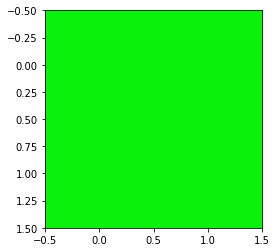

yellow, R,G,B: 253.046236038208 243.51469069719315 2.0451034605503082


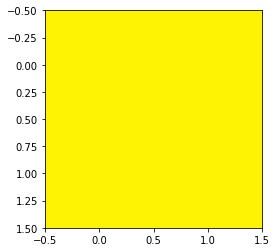

orange, R,G,B: 252.72538125514984 160.41035324335098 2.588633894920349


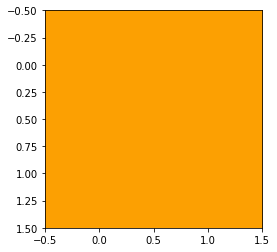

red, R,G,B: 246.1600023508072 7.922650873661041 7.536120414733887


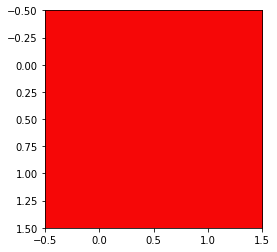

In [774]:
predict('white')
predict('black')
predict('gray')
predict('violet')
predict('indigo')
predict('blue')
predict('green')
predict('yellow')
predict('orange')
predict('red')

royal green, R,G,B: 20.057710111141205 116.44806504249573 94.27335172891617


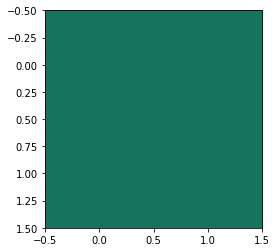

very dark green, R,G,B: 8.46178874373436 58.42089995741844 36.45073726773262


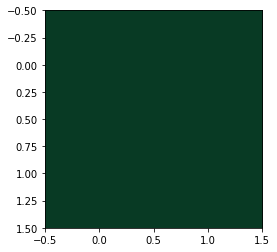

dark green, R,G,B: 10.950693190097809 102.01622664928436 14.421502947807312


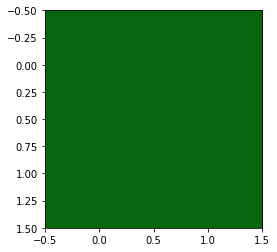

forest, R,G,B: 27.535974830389023 139.5729097723961 32.22562998533249


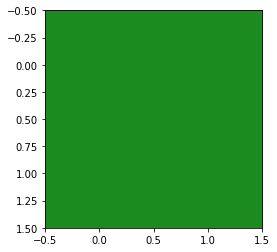

green, R,G,B: 9.06978651881218 242.62646555900574 11.496944278478622


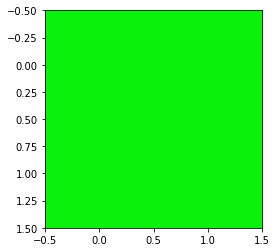

light green, R,G,B: 143.92949759960175 240.4673758149147 145.17970651388168


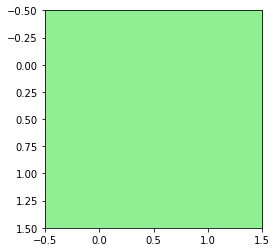

very light green, R,G,B: 158.26644748449326 229.97049987316132 137.75805115699768


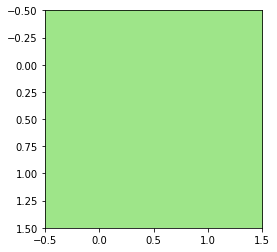

lemon, R,G,B: 249.2523980140686 247.53181993961334 3.8136501610279083


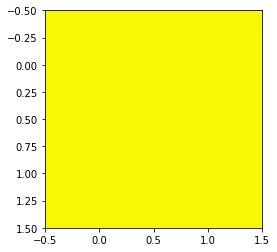

green lemon, R,G,B: 230.19848763942719 252.23572432994843 2.380298674106598


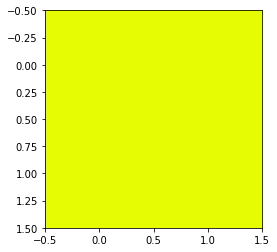

violet, R,G,B: 143.5609781742096 4.841145426034927 244.92139041423798


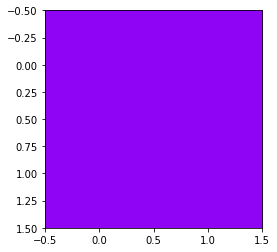

purple, R,G,B: 120.29530540108681 23.832602351903915 122.73037433624268


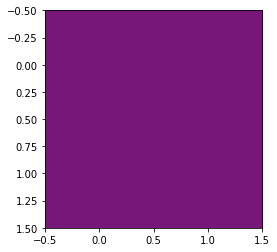

indigo, R,G,B: 73.56041997671127 5.026985853910446 124.16868835687637


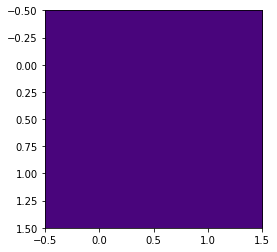

In [790]:
predict('royal green')
predict('very dark green')
predict('dark green')
predict('forest')
predict('green')
predict('light green')
predict('very light green')
predict('lemon')
predict('green lemon')
# predict('greenish lemon')
# predict('lemon lime')

predict('violet')
predict('purple')
predict('indigo')

peach, R,G,B: 250.76175302267075 138.8120537996292 82.66435146331787


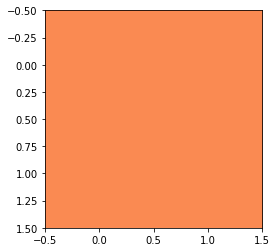

deep peach, R,G,B: 248.6568483710289 107.73236632347107 107.60537713766098


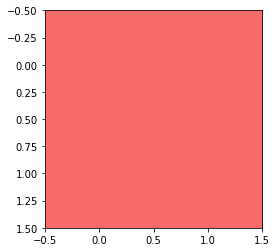

very deep peach, R,G,B: 208.97732555866241 59.64197963476181 110.98028004169464


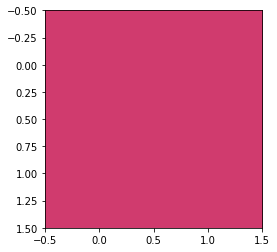

deep peach, R,G,B: 248.6568483710289 107.73236632347107 107.60537713766098


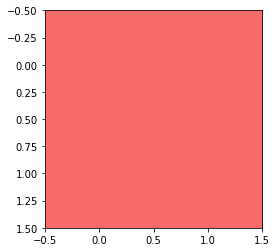

peach, R,G,B: 250.76175302267075 138.8120537996292 82.66435146331787


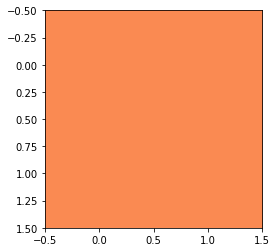

light peach, R,G,B: 253.03368151187897 186.02500677108765 114.16812658309937


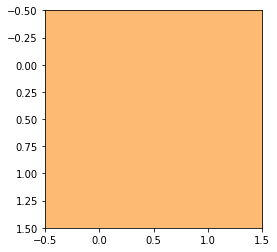

very light peach, R,G,B: 252.19152510166168 213.9141270518303 155.36278009414673


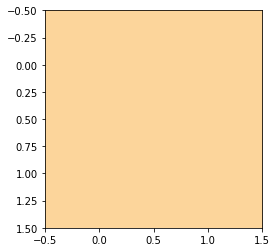

enter a color:no


In [794]:
while(True):
  string=input("enter a color:")
  if (string=='no'):
    break
  predict(string)

In [793]:
model.save('wordtorgb.h5')

red green blue, R,G,B: 21.702565848827362 107.68716394901276 176.343232691288


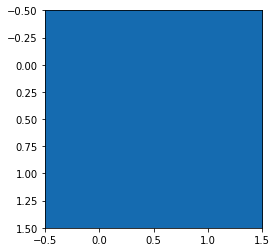

0.22023797035217285 ms


In [776]:
import time
time1=time.time()
predict('red green blue')
print(time.time()-time1,"ms")

analysis

In [777]:
#normalized_values

In [785]:
y_hat=model.predict(test_padded_names)
y_hat[:3]
#y_hat=scale(y_hat)

array([[0.93570685, 0.9588035 , 0.97456765],
       [0.97426   , 0.9250566 , 0.8407027 ],
       [0.01317364, 0.9799511 , 0.98327214]], dtype=float32)

In [786]:
y_hat=scale(y_hat)
r=np.array(data_test['R'])
r=r.reshape([r.shape[0],1])
g=np.array(data_test['G'])
g=g.reshape([g.shape[0],1])
b=np.array(data_test['B'])
b=b.reshape([b.shape[0],1])
test_rgb_values=np.concatenate((r,g,b),axis=1)

In [787]:
y_hat[:3]

array([[238.60526  , 244.49489  , 248.51476  ],
       [248.4363   , 235.88942  , 214.3792   ],
       [  3.3592782, 249.88753  , 250.73439  ]], dtype=float32)

In [781]:
# def similiarity(y_hat,y):


In [782]:
def plot(y_hat,y):
  
    name = name.lower()
    tokenized = nltk.word_tokenize(name)
    tokenized= [vocab_dict[word] for word in tokenized]
    tokenized=np.array(tokenized)
    # print(tokenized.dtype)
    # print(tokenized.shape)
    # print(tokenized)
    # print(tokenized[0])
    padded = preprocessing.sequence.pad_sequences([tokenized], maxlen=maxlen)
    #print(tokenized)
    pred = model.predict(np.array(padded))[0]
    #print(pred)
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    img=np.zeros([2,2,3])
    channel=[r,g,b]
    for c in range(3):
      img[:,:,c]=channel[c]
    img=img.astype(np.uint8)
    plt.imshow(img)
    plt.show()

In [783]:
y_hat.shape[0]

144

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations


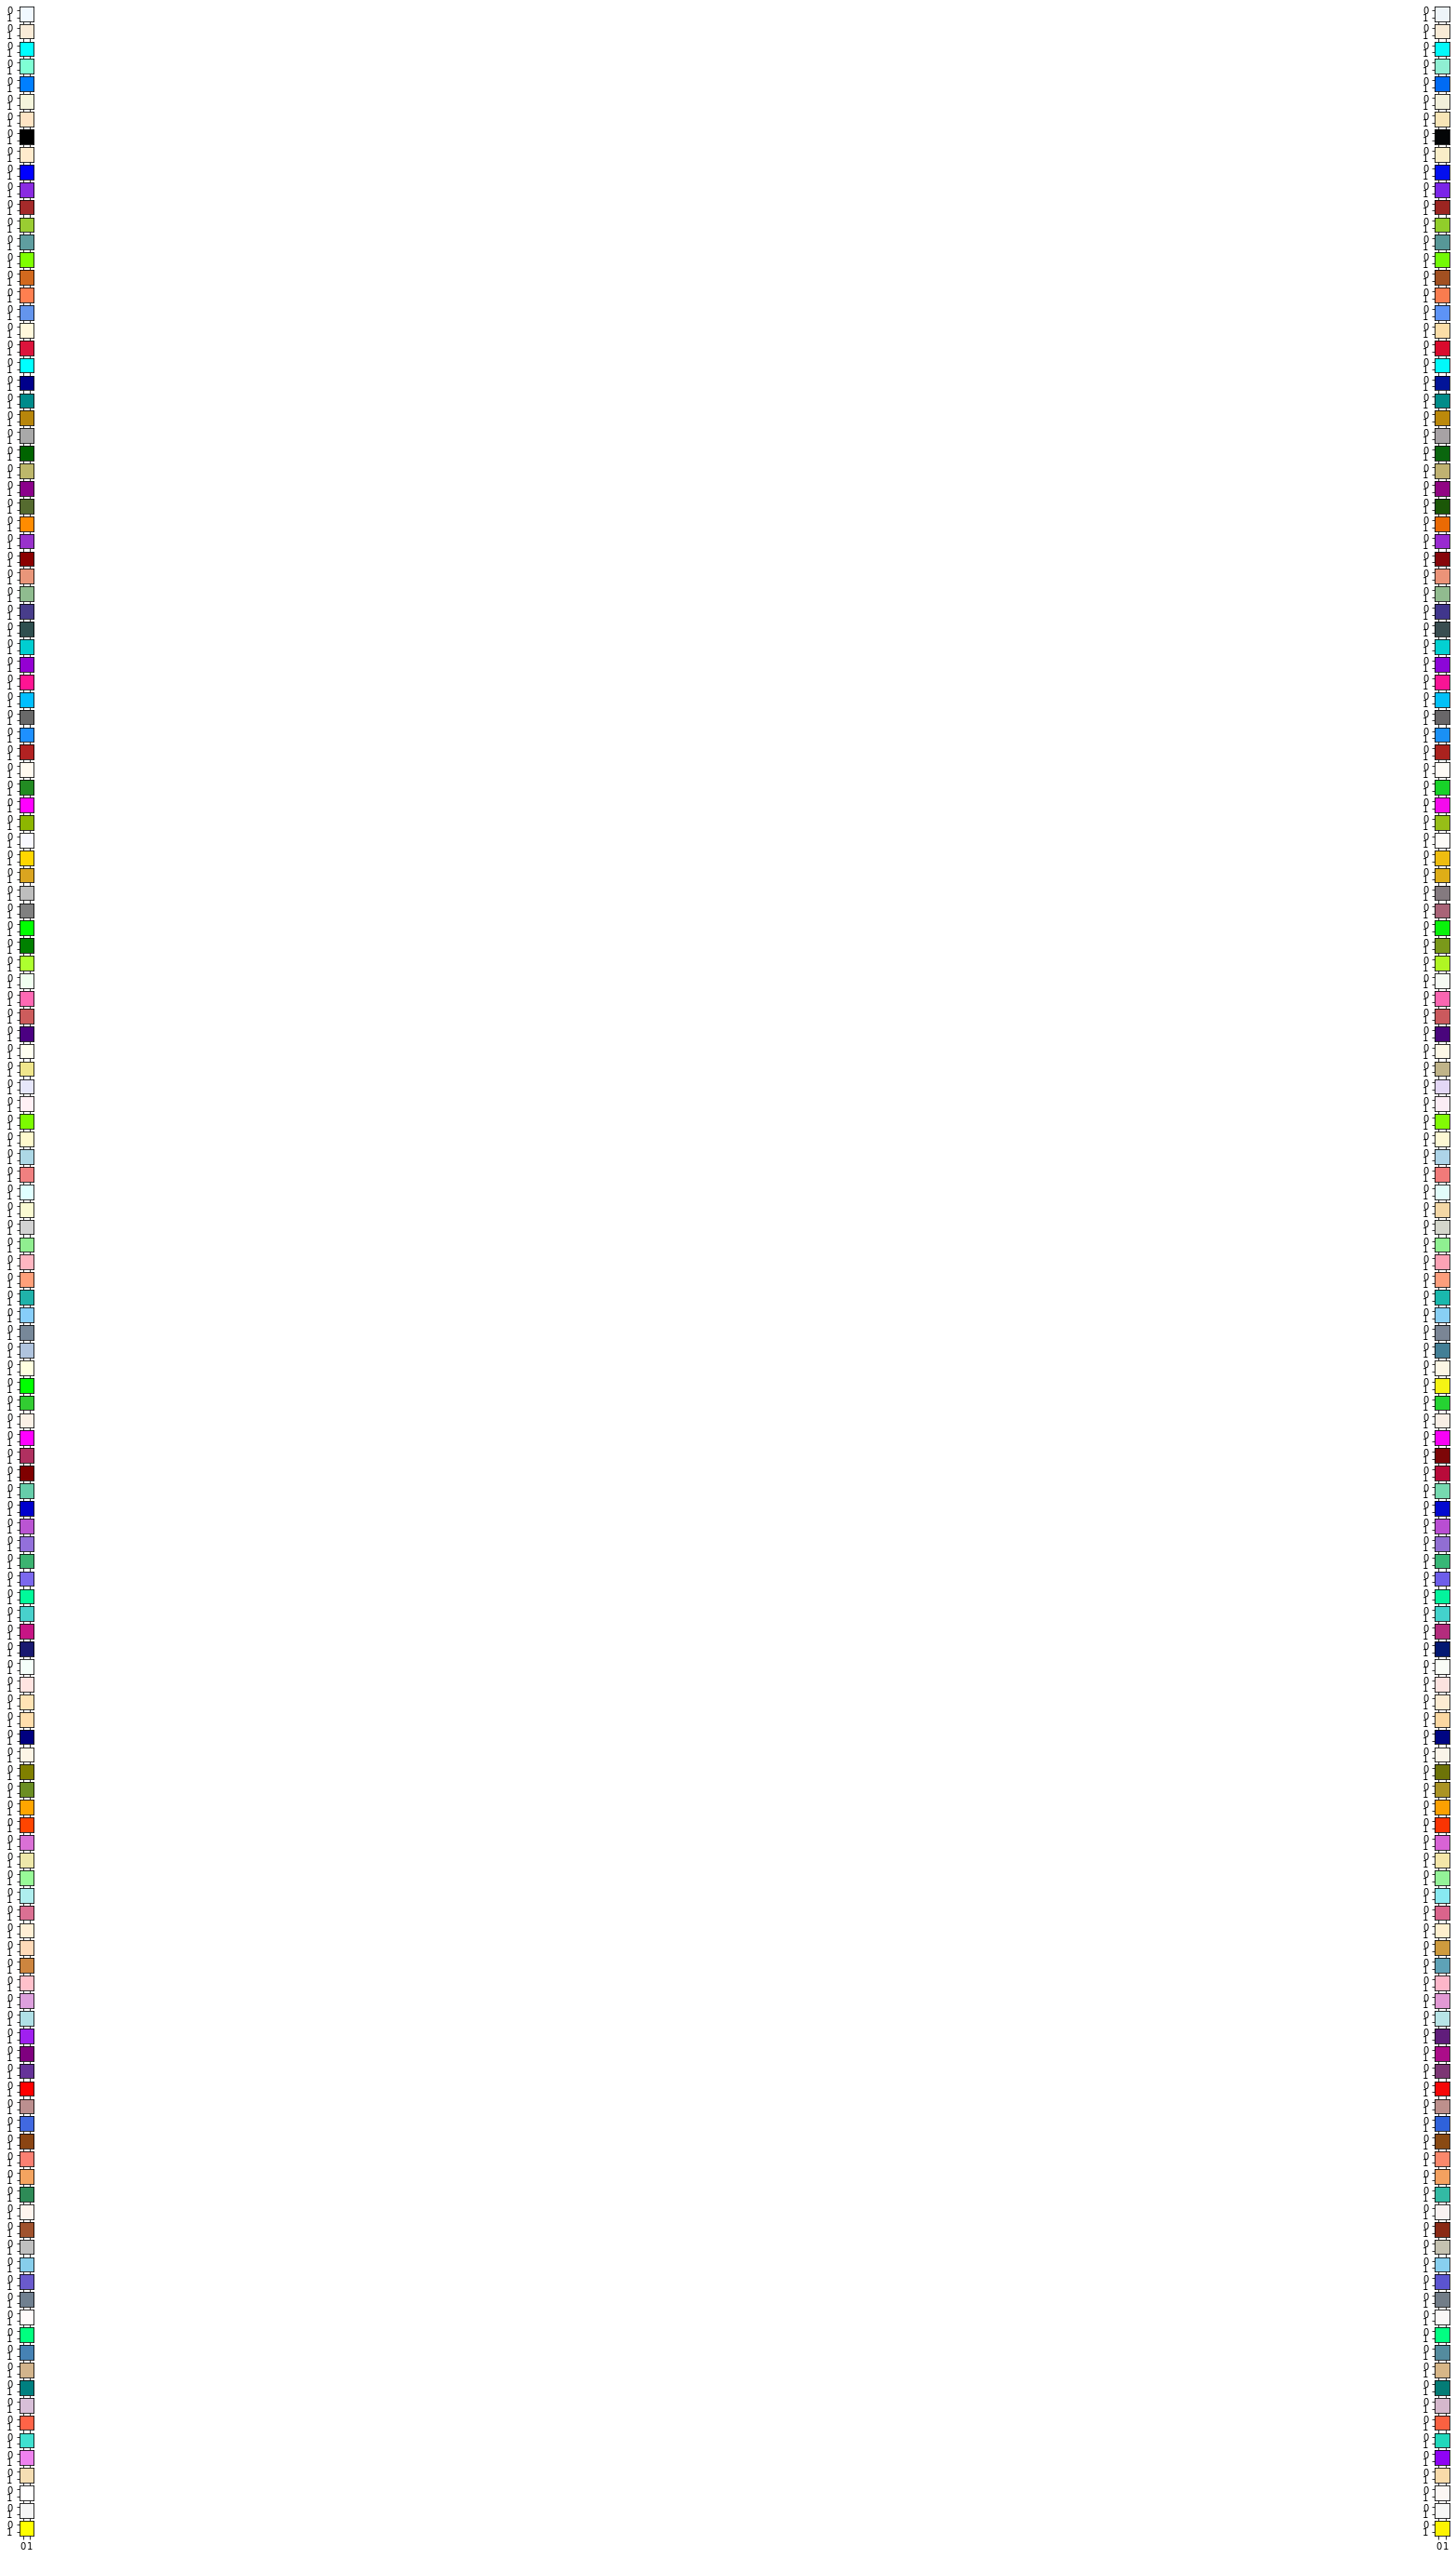

In [784]:
from matplotlib.gridspec import GridSpec

f, axarr = plt.subplots(144,2,figsize=(50,50))

for i in range(144):
  for j in range(2):
    if(j==0):
      img=np.zeros([2,2,3])
      channel=test_rgb_values[i,:]
      for c in range(3):
        img[:,:,c]=channel[c]
      img=img.astype(np.uint8)
      axarr[i,0].imshow(img)
    else:
      img=np.zeros([2,2,3])
      channel=y_hat[i,:]
      for c in range(3):
        img[:,:,c]=channel[c]
      img=img.astype(np.uint8)
      axarr[i,1].imshow(img)
# axarr[0,1].imshow(image_datas[1])
# axarr[1,0].imshow(image_datas[2])
# axarr[1,1].imshow(image_datas[3])
f.tight_layout()
plt.show()